In [1]:
import os
import pandas as pd
from glob import glob
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import seaborn as sns 
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D ,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
%matplotlib inline

In [2]:
# import pathlib
# data_dir = pathlib.Path('./Data')

# import splitfolders
# splitfolders.ratio(data_dir, output="output", seed=1337, ratio=(.8,0.2))

In [3]:
train_path = "./output/train/"
test_path  = "./output/test/"

dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\Masked'):
    
    img = imread(test_path+'\\Masked'+'\\'+image_filename)
    d1,d2,_ = img.shape
    dim1.append(d1)
    dim2.append(d2)

image_shape = (int(np.mean(dim1)),int(np.mean(dim2)),1)
print(image_shape)

(130, 130, 1)


In [4]:
traindata_gen=ImageDataGenerator(
                             rescale=1/255.,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             fill_mode='nearest'
                              )

testdata_gen=ImageDataGenerator(
                             
                             rescale=1/255.)


In [5]:
batch_size = 32
traning_set=traindata_gen.flow_from_directory(train_path,
                                              target_size =image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical')

testing_set=testdata_gen.flow_from_directory(test_path,
                                            target_size = image_shape[:2],
                                                 batch_size = batch_size,
                                                 color_mode="grayscale",
                                                 class_mode = 'categorical',
                                            shuffle=False)

Found 2220 images belonging to 2 classes.
Found 556 images belonging to 2 classes.


In [6]:
testing_set.class_indices

{'Masked': 0, 'Unmasked': 1}

In [7]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=image_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [8]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [9]:
result = model.fit(
  traning_set,
  epochs=10,
  validation_data=testing_set,
  callbacks=[early_stop]
    
)

Epoch 1/10
70/70 [==============================] - 16s 124ms/step - loss: 0.6152 - accuracy: 0.6604 - val_loss: 0.4189 - val_accuracy: 0.7896
Epoch 2/10
70/70 [==============================] - 7s 104ms/step - loss: 0.3986 - accuracy: 0.8023 - val_loss: 0.2403 - val_accuracy: 0.8957
Epoch 3/10
70/70 [==============================] - 7s 102ms/step - loss: 0.3254 - accuracy: 0.8482 - val_loss: 0.2684 - val_accuracy: 0.8633 - loss: 0.3222 


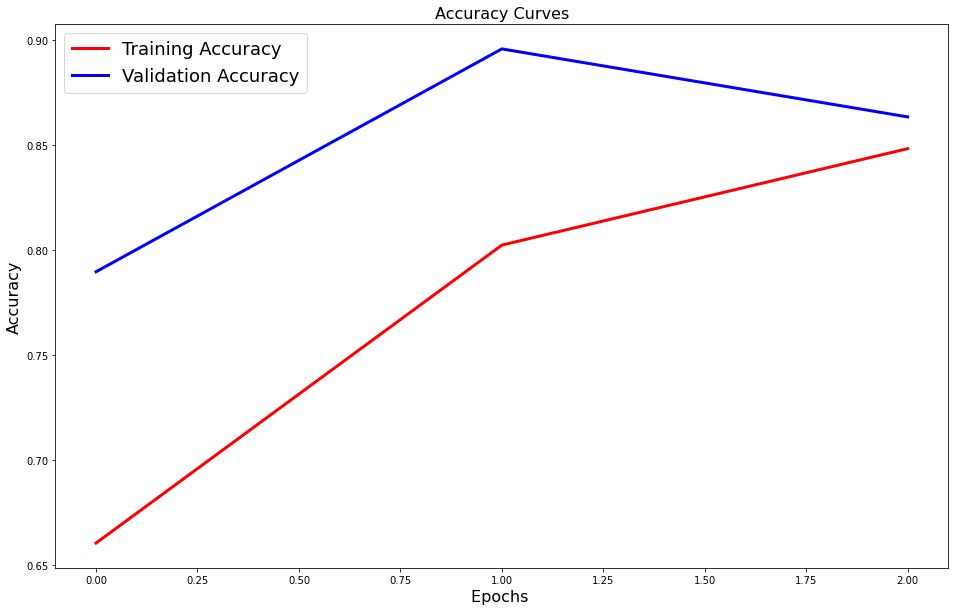

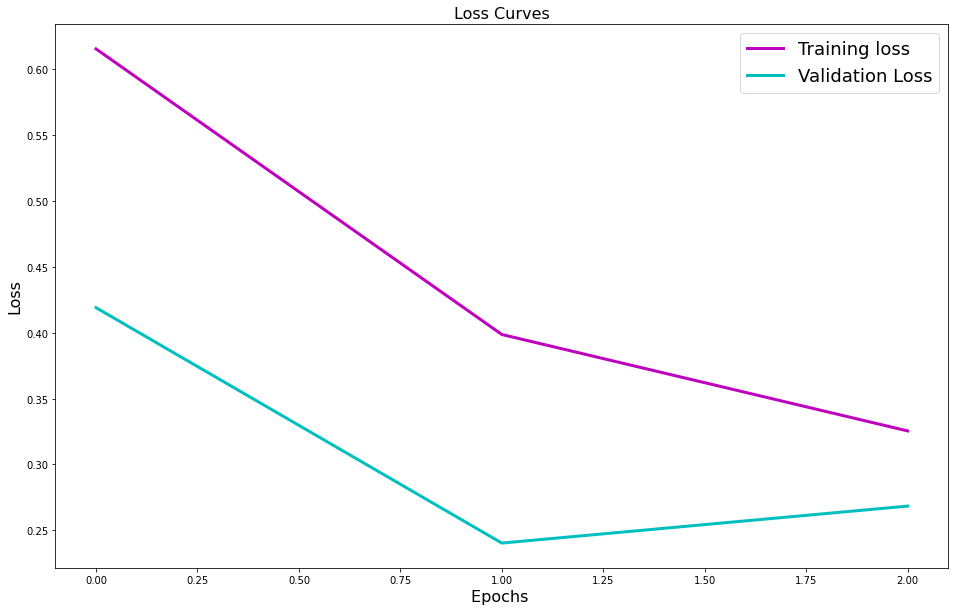

In [10]:
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (16.0, 10.0)
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelBinarizer

def plot_accuracy(history):
    training_accuracy = history.history['accuracy']
    validation_accuracy = history.history['val_accuracy']
    plt.plot(training_accuracy,'r',linewidth=3.0)
    plt.plot(validation_accuracy,'b',linewidth=3.0)
    plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
    plt.xlabel('Epochs ',fontsize=16)
    plt.ylabel('Accuracy',fontsize=16)
    plt.title('Accuracy Curves',fontsize=16)
    plt.show()

def plot_loss(history):
  
  training_loss = history.history['loss']
  validation_loss = history.history['val_loss']
  plt.plot(training_loss,'m',linewidth=3.0)
  plt.plot(validation_loss,'c',linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
  plt.xlabel('Epochs ',fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)
  plt.show()

    
def plot_confusionMatrix(model,val_x,val_y):
    predicted = []
    predicted_prob = model.predict(val_x)
    for pred in predicted_prob:
        predicted.append(np.argmax(pred))
    
    classes = np.unique(val_y)
    cm = confusion_matrix(val_y, predicted)
    fig, ax = plt.subplots(figsize=(10,10) , dpi = 100)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
        cbar=False)
    ax.set(xlabel="Pred", ylabel="True", xticklabels= classes, 
    yticklabels=classes, title="Confusion matrix")
    plt.yticks(rotation=0)
    plt.show()
    
    
plot_accuracy(result)
plot_loss(result)

In [ ]:
plot_confusionMatrix(model,testing_set,testing_set.class_indices)

In [11]:
model.save('Gray.h5')